In [1]:

def preprocess(data, target_label='checked'):
    
    # Define your features and target
    X = data.drop(target_label, axis=1)
    y = data[target_label]

    return X, y


from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.14, 0.145, 0.15],
    'n_estimators': [300],
    'max_depth': [5],
    'min_samples_split': [800],
    'min_samples_leaf': [120, 125, 130],
}


# Create the GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Define the GridSearchCV object
grid_search = RandomizedSearchCV(model, param_grid, scoring='recall', cv=5, n_jobs=4)



model = GradientBoostingClassifier()

ds_train = pd.read_csv('./../data/train.csv')
ds_test = pd.read_csv('./../data/test.csv')
instance_weights = pd.read_csv('./../data/instance_weights.csv')['instance_weights']
print(instance_weights.shape)

X_train, y_train = preprocess(ds_train)
X_test, y_test = preprocess(ds_test)
    
# Fit the grid search to the data
grid_search.fit(X_train, y_train, sample_weight=instance_weights.to_numpy())

    
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred_rew = grid_search.predict(X_test)

results = classification_report(y_pred_rew, y_test)
tn, fp, fn, tp  = confusion_matrix(y_pred_rew, y_test)
print(f"tn: {tn} fp: {fp} fn: {fn} tp: {tp} ")
print(results)


(10116,)


d:\tudelft\test-val-for-ai-project\.env\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 300, 'min_samples_split': 800, 'min_samples_leaf': 130, 'max_depth': 5, 'learning_rate': 0.145}
Best score: 0.6095025125628142
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2354
           1       0.58      0.90      0.71       175

    accuracy                           0.95      2529
   macro avg       0.79      0.92      0.84      2529
weighted avg       0.96      0.95      0.95      2529



In [9]:
# Example usage (replace with your actual model, data, and feature name)
model = GradientBoostingClassifier(n_estimators=300, min_samples_split=800, min_samples_leaf=130, max_depth=5, learning_rate=0.145)

ds_train = pd.read_csv('./../data/train.csv')
ds_test = pd.read_csv('./../data/test.csv')

instance_weights = pd.read_csv('./../data/instance_weights.csv')['instance_weights']

X_train, y_train = preprocess(ds_train)
X_test, y_test = preprocess(ds_test)

# Fit the grid search to the data
model.fit(X_train, y_train, sample_weight=instance_weights.to_numpy())

# Make predictions on the test set
y_pred = model.predict(X_test)

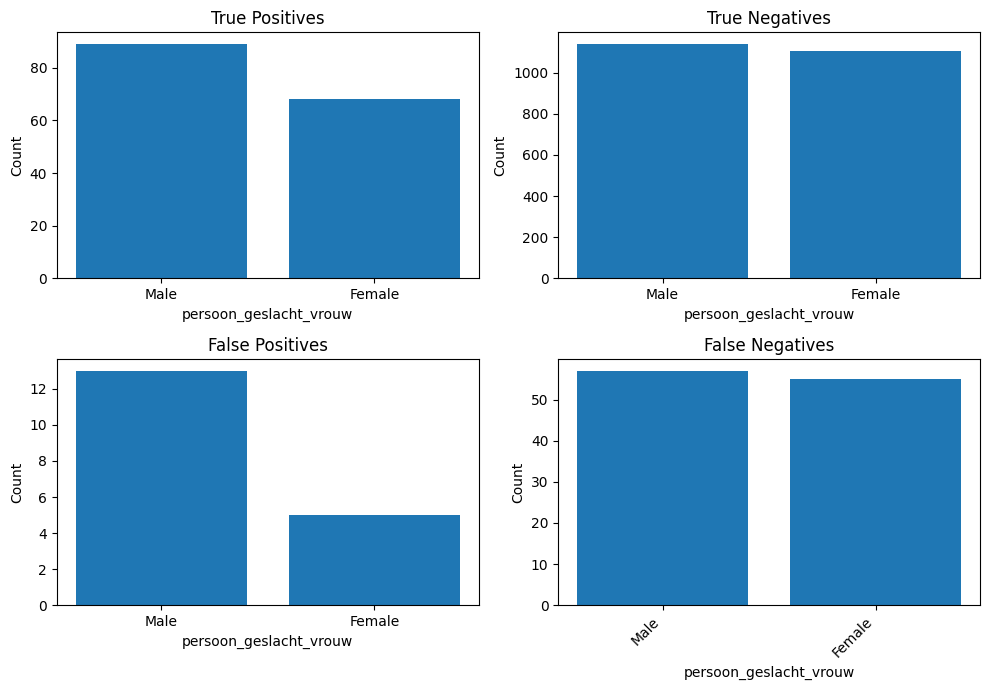

In [37]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

def plot_classification_by_feature(X_test, y_test, y_pred, feature_name, feature_map=None):
    """
    Plots true negatives, true positives, false negatives, and false positives grouped by a feature.

    Args:
        model: Trained GradientBoostingClassifier model.
        X_test: Pandas dataframe containing the test features.
        y_test: Pandas Series containing the true labels for the test set.
        feature_name: Name of the feature to group classifications by.
    """

    # Store counts for each classification type and feature value
    class_counts = {'TP': {0: 0, 1: 0}, 'TN': {0: 0, 1: 0}, 'FP': {0: 0, 1: 0}, 'FN': {0: 0, 1: 0}}
    for i, (y_true, y_pred, feature_value) in enumerate(zip(y_test, y_pred, X_test[feature_name])):
        if y_true == 1 and y_pred == 1:
            class_counts['TP'][feature_value] += 1
        elif y_true == 1 and y_pred == 0:
            class_counts['FN'][feature_value] += 1
        elif y_true == 0 and y_pred == 1:
            class_counts['FP'][feature_value] += 1
        else:
            class_counts['TN'][feature_value] += 1

    # Extract data for plotting
    unique_features = sorted(set(X_test[feature_name]))

    # Create the figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))


    features = []
    if feature_map != None:
        
        for feature_value in unique_features:
            features.append(feature_map[feature_value])
    else:
        features = unique_features
    
    
    # Plot true positives
    axes[0, 0].bar(features, [class_counts['TP'][v] for v in unique_features], label='True Positives')
    axes[0, 0].set_xlabel(feature_name)
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_title('True Positives')
    axes[0, 0].set_xticks(unique_features)

    # Plot true negatives
    axes[0, 1].bar(features, [class_counts['TN'][v] for v in unique_features], label='True Negatives')
    axes[0, 1].set_xlabel(feature_name)
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_title('True Negatives')
    axes[0, 1].set_xticks(unique_features)

    # Plot false positives
    axes[1, 0].bar(features, [class_counts['FP'][v] for v in unique_features], label='False Positives')
    axes[1, 0].set_xlabel(feature_name)
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('False Positives')
    axes[1, 0].set_xticks(unique_features)

    # Plot false negatives
    axes[1, 1].bar(features, [class_counts['FN'][v] for v in unique_features], label='False Negatives')
    axes[1, 1].set_xlabel(feature_name)
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('False Negatives')
    axes[1, 1].set_xticks(unique_features)

    # Common x labels for all subplots
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


  
feature_name = 'persoon_geslacht_vrouw'

# Condition to check
condition = X_test['persoon_leeftijd_onderzoek'] > 2

# Change values based on condition
df.loc[condition, 'col2'] = 'replaced'

plot_classification_by_feature(X_test, y_test, y_pred, feature_name, feature_map={0: 'Male', 1: 'Female'})
plot_classification_by_feature(X_test, y_test, y_pred, feature_name, feature_map={0: 'Male', 1: 'Female'})